### FIR and IIR function



In [14]:
import numpy as np
from scipy.signal import firwin, butter, lfilter,filtfilt,buttord,cheb1ord,ellipord


In [22]:
def filter_2sFIR(sig,f,fs,n,type):

    """
    A two-stage FIR filter processing using the window method

    The  input arguments are identical to those used in FIRPM
    sig: is the signal to be filtered arranged, each row is a measurement
    f: a vector of cutoff frequencies in Hz. f is a number for lowpass and
        highpass filters, and is a two-element vector for bandpass or bandstop
        filter.
    fs: the sampling frequency.
    n: the order of FIR filter.
    type: 'lowpass' for lowpass filter 'highpass' for highpass filter 
        'bandpass' for bandpass filter 'bandstop' for bandstop filter.
    win: assign the N+1 length window vector to window the impulse response. 
        (same way as in PWELCH). Default is hamming window.

    Details of input arguments and examples, please help FIR1.

    """
    if type == 'highpass' or type == 'bandstop':
        n |=1   # Ensure that n is odd. The statement sets the lowest bit of n to 1
    b = firwin(n,f,fs=fs, pass_zero=type)
    sigfilter = filtfilt(b,1,sig)
    return sigfilter


In [32]:
def filter_2sIIR(sig,f,fs,n,type):

    """
    A two-stage IIR filter processing using Butterworth filter design

    The  input arguments are identical to those used in BUTTER
    sig: is the signal to be filtered arranged
    f: a vector of cutoff frequencies in Hz. f is a number for lowpass and
        highpass filters, and is a two-element vector for bandpass or bandstop
        filter.
    fs: the sampling frequency.
    n: the order of IIR filter.
    type: 'low' for lowpass filter 'high' for highpass filter 
        'bandpass' for bandpass filter 'stop' for bandstop filter.
    """

    b, a = butter(n, f, btype=type,fs=fs)
    # b, a = cheb1ord(n, f, btype=type,fs=fs)
    # b, a = ellipord(n, f, btype=type,fs=fs)
    
    sigfilter = filtfilt(b,a,sig)
    
    return sigfilter

### Data Generation

Text(0.5, 0, 'Time (s)')

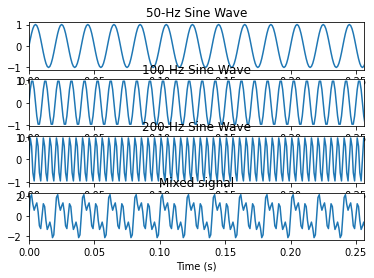

In [24]:
import numpy as np
from numpy import sin, pi
from matplotlib.pyplot import figure, subplot,plot,xlim,title,ylim,xlabel,ylabel
import matplotlib.pyplot as plt

## initialize parameters
samplerate=1000 # in Hz
N=1024 # data length

sinefreq1=50 # in Hz
sinefreq2=100 # in Hz
sinefreq3=200 # in Hz

fl=75   # low-cutoff frequency
fh=165  # high-cutoff frequency
forder=180
## generate simulated signals 
t=np.arange(N)/samplerate
sig1=sin(2*pi*sinefreq1*t)
sig2=sin(2*pi*sinefreq2*t)
sig3=sin(2*pi*sinefreq3*t)

data=sig1+sig2+sig3

figure() 
subplot(4,1,1),plot(t,sig1),xlim(t[0], t[N//4])
title(str(sinefreq1) + '-Hz Sine Wave')
subplot(4,1,2),plot(t,sig2),xlim(t[0], t[N//4])
title(str(sinefreq2) + '-Hz Sine Wave')
subplot(4,1,3),plot(t,sig3),xlim(t[0], t[N//4])
title(str(sinefreq3) + '-Hz Sine Wave')
subplot(4,1,4),plot(t,data),xlim(t[0], t[N//4])
title('Mixed signal')
xlabel('Time (s)')

### FIR filter 

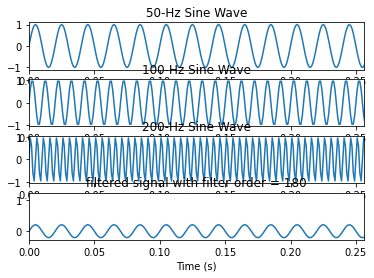

In [28]:
## Apply 2-stage FIR filter processing
### lowpass filter
# data_2sFIR = filter_2sFIR(data,fl,samplerate,forder,'lowpass') 

### highpass filter
# data_2sFIR = filter_2sFIR(data,fh,samplerate,forder,'highpass') 

### bandpass filter
data_2sFIR = filter_2sFIR(data,[fl,fh],samplerate,20,'bandpass')  

### bandstop filter
# data_2sFIR = filter_2sFIR(data,[fl,fh],samplerate,forder,'bandstop')  

figure(), 
subplot(4,1,1),plot(t,sig1),xlim(t[0], t[N//4])
title(str(sinefreq1) + '-Hz Sine Wave')
subplot(4,1,2),plot(t,sig2),xlim(t[0], t[N//4])
title(str(sinefreq2) + '-Hz Sine Wave')
subplot(4,1,3),plot(t,sig3),xlim(t[0], t[N//4])
title(str(sinefreq3) + '-Hz Sine Wave')
subplot(4,1,4),plot(t,data_2sFIR),xlim(t[0], t[N//4])
title('filtered signal with filter order = '+ str(forder))
xlabel('Time (s)')

plt.show()

### 4 IIR filter Test

In [33]:
fl=75   # low-cutoff frequency
fh=165  # high-cutoff frequency
forder=6

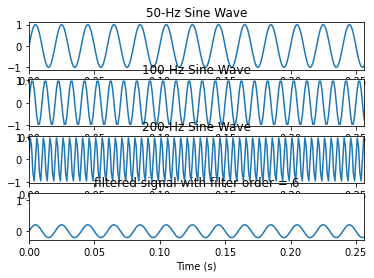

In [34]:
## Apply 2-stage IIR filter processing
### lowpass filter
# data_2sIIR = filter_2sIIR(data,fl,samplerate,forder,'low') 

### bandpass filter
data_2sIIR = filter_2sIIR(data,[fl,fh],samplerate,forder,'bandpass') 

### highpass filter
# data_2sIIR = filter_2sIIR(data,fh,samplerate,forder,'high')  

### bandstop filter
# data_2sIIR = filter_2sIIR(data,[fl, fh],samplerate,forder,'stop')  


figure(), 
subplot(4,1,1),plot(t,sig1),xlim(t[0], t[N//4])
title(str(sinefreq1) + '-Hz Sine Wave')
subplot(4,1,2),plot(t,sig2),xlim(t[0], t[N//4])
title(str(sinefreq2) + '-Hz Sine Wave')
subplot(4,1,3),plot(t,sig3),xlim(t[0], t[N//4])
title(str(sinefreq3) + '-Hz Sine Wave')
subplot(4,1,4),plot(t,data_2sFIR),xlim(t[0], t[N//4])
title('filtered signal with filter order = '+ str(forder))
xlabel('Time (s)')

plt.show()